# Perceptual decision making (3)

We have introduced a drift-diffusion model of perceptual decision-making. The DDM can well account for perceptual choice and reaction time data. 

We next seek to undertand: can this model account for the phenomenon of speed-accuracy trade-off in psychology?

We assume that a subject's impulsivity in decision-making can be modeled by adjusting decision bounds.

* Low decision bound — impulsive decision-maker
  * Accumulated evidence quickly reaches boundary but possibly due to noise
* High decision bound — conservative decisoin-making
  * Accumulated evidence slow reaches boundary but with high accuracy

In [1]:
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt

# let's repeat the ddm function
def ddm1(D=10, f=0.55, B=40):
    # <D>: number of dots
    # <f>: fraction of dots moving to the correct direction
    # <B>: decision boundary
    i = 0
    N_correct = 0
    N_wrong = 0
    delta = [] # set delta as a list
    delta.append(N_correct - N_wrong)

    while np.abs(delta[i]) < B:
        for j in range(D):
            # sample the direction of this dot
            dir = bernoulli.rvs(f, size=1)[0] 
            # update the counts
            N_correct = N_correct + dir
            N_wrong = N_wrong + (1-dir)
        
        # add one frame
        i = i + 1
        # compute difference
        delta.append(N_correct - N_wrong)

    correct = (delta[-1]>0) #正确与否
    RT = i # reaction time
        
    return correct, RT, delta 

In [2]:
# We set decision boundary
B = [2, 4, 8, 16, 32] 

nTrial = 100 # number of trial

meanACC = np.empty(len(B)) # averaged accuracy
meanRT = np.empty(len(B)) # averaged reaction time
choice = np.empty(nTrial) # choice in each trial
RT = np.empty(nTrial) # reaction time in each trial

for idx, val in enumerate(B): # loop boundary
    for i in range(nTrial): # 每个boundary我们模拟很多trial
        choice[i], RT[i],_ = ddm1(B=val)
    meanACC[idx] = choice.mean()
    meanRT[idx] = RT.mean()

Let's draw the relations between decision bounds, accuracy, and reaction time 

Text(0, 0.5, 'Accuracy')

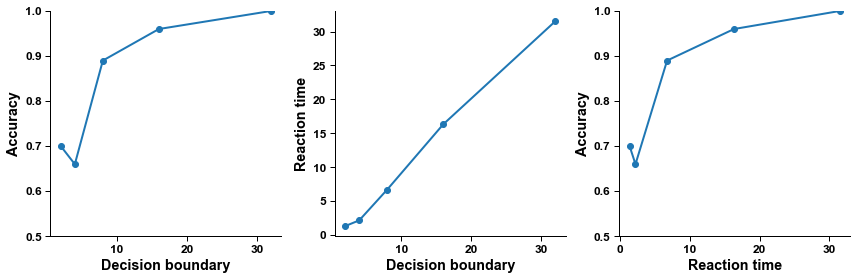

In [4]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))

# draw accuracy as a function of decision boundary
plt.sca(ax[0])
plt.plot(B, meanACC, '-o') 
plt.ylim([0.5, 1])
plt.ylabel('Accuracy')
plt.xlabel('Decision boundary')

# draw reaction as a function of decision boundary
plt.sca(ax[1])
plt.plot(B, meanRT, '-o')
plt.ylabel('Reaction time')
plt.xlabel('Decision boundary')

# draw accuracy as a function of reaction time
plt.sca(ax[2])
plt.plot(meanRT, meanACC, '-o')
plt.ylim([0.5, 1])
plt.xlabel('Reaction time')
plt.ylabel('Accuracy')

Consistent with empirical data, increased decision bounds heighten accuracy also lengthen reaction time.

We next seek to understand how coherence level (task difficulty) modulates their relations

In [5]:
coh = np.array([0.032, 0.064, 0.128, 0.256, 0.52])
f = (coh+1)/2 # convert coh to f

B = 5 # decision boundary

nTrial = 100 

meanACC = np.empty(len(f))
meanRT = np.empty(len(f))
choice = np.empty(nTrial)
RT = np.empty(nTrial)

for idx, val in enumerate(f):
    for i in range(nTrial): # 每个boundary我们模拟很多trial
        choice[i], RT[i],_ = ddm1(D=5, f=val, B=B)
    meanACC[idx] = choice.mean()
    meanRT[idx] = RT.mean()

We next draw the relation between coherence, accuracy, and reaction time

Text(0.5, 0, 'Coherence')

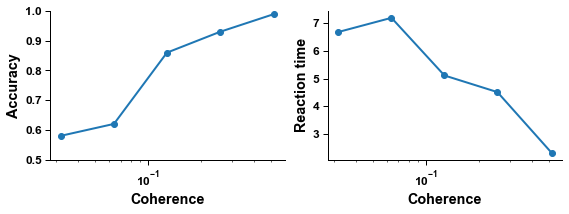

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# draw accuracy as a function of coherence
plt.sca(ax[0])
plt.plot(coh, meanACC, '-o') 
plt.ylim([0.5, 1])
plt.ylabel('Accuracy')
plt.xlabel('Coherence')
plt.xscale('log')

# draw reaction time as a function of coherence
plt.sca(ax[1])
plt.plot(coh, meanRT, '-o')
plt.xscale('log')
plt.ylabel('Reaction time (# of frames)')
plt.xlabel('Coherence')

## Summary
1. Drift-diffusion model can well account the speed-accuracy tradeoff in perceptual decision making
2. Decision impulsivity is associated with decision bounds
   1. impulsive = low decision bound
   2. conservative = high decision bound